# Panda 操作

## 数据读写

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sqlalchemy import create_engine
from datetime import datetime, timedelta
from IPython.core.interactiveshell import InteractiveShell
import warnings

warnings.filterwarnings("ignore")
InteractiveShell.ast_node_interactivity = "all"
# db_connect_string = 'mysql://user:pass@ip:port/db?charset=utf8'
# engine = create_engine(db_connect_string)

## 数据读写

In [ ]:
df_nav = pd.read_excel('output/nav.xls')
# df_nav = pd.read_excel('output/nav.xls',index_col='date_time')
# df_nav.to_excel('output/nav2.xls', index=False)
# with engine.connect() as conn:
#     df = pd.read_sql('select * from fund', conn)
#     df.to_sql('fofs_calculate', conn, if_exists="append", index=False)
df_nav = df_nav[['code','nav','date_time']]
df_nav.index = df_nav['date_time']
df_nav.head()

,code,nav,date_time
date_time,,,
2016-01-04,1,0.999001,2016-01-04
2016-01-04,2,0.999001,2016-01-04
2016-01-05,1,1.000297,2016-01-05
2016-01-05,2,1.000500,2016-01-05
2016-01-06,1,1.004318,2016-01-06


## 转换（DataFrame - Series）

In [3]:
df_nav2 = pd.DataFrame()
dic = {'date_time': datetime.today(), 'nav': np.random.random(), 'code': '1'}
list = [dic]
# 词典转df
df_nav2 = df_nav2.from_dict(dic, orient='index').T
# list转df
df_nav2 = pd.DataFrame(list, columns=['code', 'nav', 'date_time'])
# df转np.array
arr = np.array(df_nav2)
# array转list
arr.tolist()
#深拷贝
df_nav2.copy()

[['1', 0.35222743308368976, Timestamp('2017-11-27 11:41:29.725000')]]

,code,nav,date_time
0,1,0.352227,2017-11-27 11:41:29.725


## 筛选（loc、iloc、ix）

> loc、iloc和ix的区别：
* 1、loc是筛选的index
* 2、iloc是筛选的行号
* 3、ix则是满足以上两种筛选方式，但是如果索引使用自增序列且与行号不一致会产生歧义

In [52]:
# 保留其中几列
df_nav = df_nav[['code','nav', 'date_time']]
# 修改索引
df_nav.index = df_nav['date_time']
# 筛选code=1的
d1 = df_nav[df_nav.code == 1]
# 筛选净值 > 1
d2 = df_nav[df_nav.nav > 1]
# 筛选 code = 1 and nav > 1的
df_nav.loc[(df_nav.code == 1) & (df_nav.nav > 1)].head()
# 前5行
d3 = df_nav[0:5]
#  df_nav[0:5]['nav'] == df_nav['nav'][0:5]都是Series
# d4 = df前5行nav列_nav['nav'][0:5]
# 取值 使用loc、iloc方式 
df_nav[0:1]['nav'].values[0]
df_nav.loc['2016-06-01']['nav']
df_nav.iloc[0]['nav']
df_nav.ix['2016-06-01']['nav']
df_nav.ix[0]['nav']
df_nav.ix[0][1]
# loc和下标方式
df_nav['nav'][0]

,code,nav,date_time
date_time,,,
2016-01-05,1,1.000297,2016-01-05
2016-01-06,1,1.004318,2016-01-06
2016-01-07,1,1.005256,2016-01-07
2016-01-08,1,1.007626,2016-01-08
2016-01-11,1,1.005755,2016-01-11


0.99900099900099926

date_time
2016-06-01    1.053859
2016-06-01    0.971399
Name: nav, dtype: float64

0.99900099900099926

date_time
2016-06-01    1.053859
2016-06-01    0.971399
Name: nav, dtype: float64

0.99900099900099926

0.99900099900099926

0.99900099900099926

## 排序（sort、sort_values）

In [5]:
# 升序排序
df_nav.sort_values(by = ['date_time','code'], inplace=True,ascending=True)
df_nav.head()

,code,nav,date_time
date_time,,,
2016-01-04,1,0.999001,2016-01-04
2016-01-04,2,0.999001,2016-01-04
2016-01-05,1,1.000297,2016-01-05
2016-01-05,2,1.000500,2016-01-05
2016-01-06,1,1.004318,2016-01-06


## 连接（concat、append、join、merge）

> concat和append的区别：
* 1、concat分为行连接和列连接需要通过axis指定
* 2、append行和列都会进行连接

In [6]:
df1 = df_nav[df_nav.code == 1][0:5]
df2 = df_nav[df_nav.code == 1][3:8]
df1
df2

,code,nav,date_time
date_time,,,
2016-01-04,1,0.999001,2016-01-04
2016-01-05,1,1.000297,2016-01-05
2016-01-06,1,1.004318,2016-01-06
2016-01-07,1,1.005256,2016-01-07
2016-01-08,1,1.007626,2016-01-08


,code,nav,date_time
date_time,,,
2016-01-07,1,1.005256,2016-01-07
2016-01-08,1,1.007626,2016-01-08
2016-01-11,1,1.005755,2016-01-11
2016-01-12,1,1.005256,2016-01-12
2016-01-13,1,1.001813,2016-01-13


### concat

In [7]:
# 行连接
df3 = pd.concat([df1, df2])
# 列连接
df4 = pd.concat([df1, df2], axis=1)
# 只连接相同索引的数据 内连接
df5 = pd.concat([df1,df2],axis=1,join='inner')
# 外连接
df6 = pd.concat([df1,df2],axis=1,join='outer')
# df3
# df4
df5
df5['nav']

,code,nav,date_time,code,nav,date_time
date_time,,,,,,
2016-01-07,1,1.005256,2016-01-07,1,1.005256,2016-01-07
2016-01-08,1,1.007626,2016-01-08,1,1.007626,2016-01-08


,nav,nav
date_time,,
2016-01-07,1.005256,1.005256
2016-01-08,1.007626,1.007626


### append

In [8]:
df3 = df1.append(df2)
df4 = df1.append(df2,ignore_index=True)
df2['pct'] = df2['nav'].pct_change()
# 使用append，行和列都会填充
df5 = df1.append(df2)
df5

,code,date_time,nav,pct
date_time,,,,
2016-01-04,1,2016-01-04,0.999001,NaN
2016-01-05,1,2016-01-05,1.000297,NaN
2016-01-06,1,2016-01-06,1.004318,NaN
2016-01-07,1,2016-01-07,1.005256,NaN
2016-01-08,1,2016-01-08,1.007626,NaN
2016-01-07,1,2016-01-07,1.005256,NaN
2016-01-08,1,2016-01-08,1.007626,0.002357
2016-01-11,1,2016-01-11,1.005755,-0.001857
2016-01-12,1,2016-01-12,1.005256,-0.000496


### join

In [9]:
#笛卡尔积 
# lsuffix:df1的column后缀 rsuffix：df2的column后缀 默认左连接
df1.join(df2,how='left',lsuffix='1',rsuffix='2')
#内连接
# 等同于
df1.join(df2,how='inner',lsuffix='1',rsuffix='2')
#外连接
df1.join(df2,how='outer',lsuffix='1',rsuffix='2')

,code1,nav1,date_time1,code2,nav2,date_time2,pct
date_time,,,,,,,
2016-01-04,1,0.999001,2016-01-04,NaN,NaN,NaN,NaN
2016-01-05,1,1.000297,2016-01-05,NaN,NaN,NaN,NaN
2016-01-06,1,1.004318,2016-01-06,NaN,NaN,NaN,NaN
2016-01-07,1,1.005256,2016-01-07,1.0,1.005256,2016-01-07,NaN
2016-01-08,1,1.007626,2016-01-08,1.0,1.007626,2016-01-08,0.002357


,code1,nav1,date_time1,code2,nav2,date_time2,pct
date_time,,,,,,,
2016-01-07,1,1.005256,2016-01-07,1,1.005256,2016-01-07,NaN
2016-01-08,1,1.007626,2016-01-08,1,1.007626,2016-01-08,0.002357


,code1,nav1,date_time1,code2,nav2,date_time2,pct
date_time,,,,,,,
2016-01-04,1.0,0.999001,2016-01-04,NaN,NaN,NaN,NaN
2016-01-05,1.0,1.000297,2016-01-05,NaN,NaN,NaN,NaN
2016-01-06,1.0,1.004318,2016-01-06,NaN,NaN,NaN,NaN
2016-01-07,1.0,1.005256,2016-01-07,1.0,1.005256,2016-01-07,NaN
2016-01-08,1.0,1.007626,2016-01-08,1.0,1.007626,2016-01-08,0.002357
2016-01-11,NaN,NaN,NaN,1.0,1.005755,2016-01-11,-0.001857
2016-01-12,NaN,NaN,NaN,1.0,1.005256,2016-01-12,-0.000496
2016-01-13,NaN,NaN,NaN,1.0,1.001813,2016-01-13,-0.003425


### merge

In [10]:
#默认 inner
df3 = pd.merge(df1, df2, how='inner', on=['code'])
# df3
# 等同 df1.merge(df2,on=['code','date_time'])
df4 = pd.merge(df1, df2, how='inner', on=['code','date_time'])
df4

,code,nav_x,date_time,nav_y,pct
0,1,1.005256,2016-01-07,1.005256,NaN
1,1,1.007626,2016-01-08,1.007626,0.002357


## 分组(groupby)

In [11]:
nav_groups = df_nav.groupby(['code','date_time'])
# 如果只是想分组，而不想reduce，可以使用set_index重建索引实 todo 
for name,values in nav_groups:
    #values是DataFrame类型
#     print name,values
    pass
# 根据key值获取分组
nav_groups.get_group((1,u'2016-01-04'))
# 分组转成词典
# nav_dic=dict(list(nav_groups))

,code,nav,date_time
date_time,,,
2016-01-04,1,0.999001,2016-01-04


In [12]:
df_groups = df_nav.groupby(['code'])
# 对分组套用函数
df_groups.agg(['mean','max','min','sum','std']).head()
df_groups.apply(lambda x:x.mean()).head()
# 返回的是Series ，使用reset_index() 转df
df_groups.apply(lambda df: np.std(df["nav"])).reset_index()

nav                                          
          mean       max       min         sum       std
code                                                    
1     1.077007  1.164345  0.954329  498.654356  0.039668
2     1.010305  1.043501  0.964726  467.771125  0.016460

,code,nav
code,,
1,1.0,1.077007
2,2.0,1.010305


,code,0
0,1,0.039625
1,2,0.016442


In [13]:
df3 = df_nav.groupby(['code', 'date_time']).mean()
df3.head()

nav
code date_time           
1    2016-01-04  0.999001
     2016-01-05  1.000297
     2016-01-06  1.004318
     2016-01-07  1.005256
     2016-01-08  1.007626

## 窗口(rolling、expanding)

In [14]:
# 现在所有函数的使用方式变成 rolling(windows).func()
# rolling_count                    返回各窗口非NA观测值的量
# rolling_sum                      移动窗口的和
# rolling_mean                     移动窗口的平均值
# rolling_median                   移动窗口的中位数
# rolling_var、rolling_std         移动窗口的方差和标准差。分母为n-1
# rolling_skew、rolling_kurt       移动窗口的偏度（三阶矩）和峰度（四阶矩）
# rolling_min、rolling_max         移动窗口的最小值和最大值
# rolling_quantile                 移动窗口指定百分位数/样本分位数位置的值
# rolling_corr、rolling_cov        移动窗口的相关系数和协方差
# rolling_apply                    对移动窗口应用普通数组函数
# ewma                             指数加权移动平均
# ewmvar、ewmstd                   指数加权移动方差和标准差
# ewmcorr、ewmcov                  指数加权移动相关系数和协方差

In [48]:
# 滚动/滑动获取20日净值最高点
df_nav['最近20个交易日的最高点'] = df_nav['nav'].rolling(20).max()
# 用最大值fillna
df_nav['最近20个交易日的最高点'].fillna(value=df_nav['nav'].expanding().max(),inplace=True)
# 滚动/滑动获取20日净值最高点
df_nav['最近20个交易日的最低点'] = df_nav['nav'].rolling(20).min()
# 用最大值fillna
df_nav['最近20个交易日的最低点'].fillna(value=df_nav['nav'].expanding().min(), inplace=True)
df_nav.head()

,code,nav,date_time,最近20个交易日的最高点,最近20个交易日的最低点
date_time,,,,,
2016-01-04,1,0.999001,2016-01-04,0.999001,0.999001
2016-01-04,2,0.999001,2016-01-04,0.999001,0.999001
2016-01-05,1,1.000297,2016-01-05,1.000297,0.999001
2016-01-05,2,1.000500,2016-01-05,1.000500,0.999001
2016-01-06,1,1.004318,2016-01-06,1.004318,0.999001


date_time
2016-01-04         NaN
2016-01-05    0.999649
2016-01-06    1.002307
2016-01-07    1.004787
2016-01-08    1.006441
Name: nav, dtype: float64

date_time
2016-01-04         NaN
2016-01-05    0.000916
2016-01-06    0.002843
2016-01-07    0.000664
2016-01-08    0.001676
Name: nav, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000009E76F98>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000A66AC50>], dtype=object)

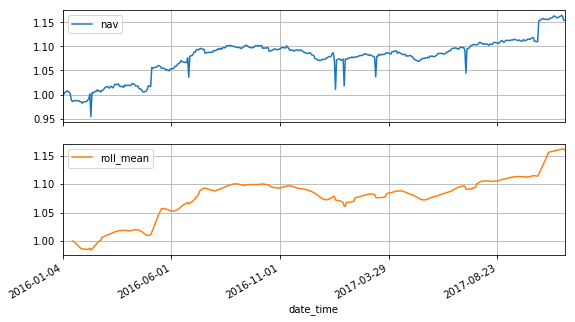

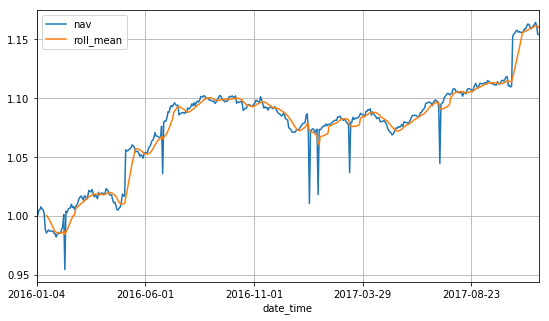

In [59]:
# 根据分组key获取分组
df3 = df_nav.groupby('code').get_group(1)
df4 = df3[0:5]
# 滑动窗口平均
df4['nav'].rolling(2).mean()
df4['nav'].rolling(2).std()
# 绘图
# df3['nav'].plot(figsize=(9, 5), grid=True)
# df3['nav'].rolling(10).mean().plot(figsize=(9, 5), grid=True)
# 推荐使用方式 使用subplots控制在在同一张图还是两张图显示曲线
df3.loc[:,'roll_mean'] = df3['nav'].rolling(10).mean()
df3[['nav','roll_mean']].plot(subplots=True,figsize=(9, 5), grid=True)
plt.show()
df3[['nav','roll_mean']].plot(subplots=False,figsize=(9, 5), grid=True)
plt.show()

## 处理nan值 （fillna）

1、方式1：把NaN直接作为一个特征，假设用0表示（精确，不丢失数据，特征维度高，计算量大）
data_train.fillna(0) 
2、方式2：用均值填充 # 填充会产生人为噪声，计算简单
data_train.fillna(data_train.mean()) 
3、方式3：用上下数据进行填充
data_train.fillna(method='pad') # 用前一个数据 
data_train.fillna(method='bfill') # 用后一个数据
4、方式4：用插值法填充
data_train.interpolate() # 插值法就是通过两点（x0，y0），（x1，y1）估计中间点的值 
5、方式5：用算法拟合进行填充（如下）

In [ ]:
# 定义browse_his缺失值预测填充函数
def set_missing_browse_his(df):
     # 把已有的数值型特征取出来输入到RandomForestRegressor中
     process_df = df[[browse_his' , 'gender', 'job', 'edu', 'marriage', 'family_type']]

     # 乘客分成已知该特征和未知该特征两部分
     known = process_df[process_df.browse_his.notnull()].as_matrix()
     unknown = process_df[process_df.browse_his.isnull()].as_matrix()

     # X为特征属性值
     X = known[:, 1:]

     # y为结果标签值
     y = known[:, 0]

     # fit到RandomForestRegressor之中
     rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
     rfr.fit(X,y)

     # 用得到的模型进行未知特征值预测
     predicted = rfr.predict(unknown[:, 1::])

     # 用得到的预测结果填补原缺失数据
     df.loc[(df.browse_his.isnull()), 'browse_his'] = predicted

     return df, rfr

data_train, rfr = set_missing_browse_his(data_train) 

In [60]:
# 这里有警告
# df3.iloc[0]['nav'] = np.nan
# df4.loc[index,'nav'] = np.nan
df4.loc['2016-01-05','nav'] = np.nan
df4
# 用均值填充
df4['nav'].fillna(df4['nav'].mean())
# 用前一个数据填充 {'backfill', 'bfill', 'pad', 'ffill', None}
# pad / ffill: propagate last valid observation forward to next valid
# backfill / bfill: use NEXT valid observation to fill gap
df4['nav'].fillna(method = 'pad')
# 不同列填充不同值 df.fillna(value=values, limit=1) 还可以通过limit 指定填充多少个
values = {'nav': 1, 'date_time': '2016-01-01'}
df4.fillna(value=values)

,code,nav,date_time
date_time,,,
2016-01-04,1,0.999001,2016-01-04
2016-01-05,1,NaN,2016-01-05
2016-01-06,1,1.004318,2016-01-06
2016-01-07,1,1.005256,2016-01-07
2016-01-08,1,1.007626,2016-01-08


date_time
2016-01-04    0.999001
2016-01-05    1.004050
2016-01-06    1.004318
2016-01-07    1.005256
2016-01-08    1.007626
Name: nav, dtype: float64

date_time
2016-01-04    0.999001
2016-01-05    0.999001
2016-01-06    1.004318
2016-01-07    1.005256
2016-01-08    1.007626
Name: nav, dtype: float64

,code,nav,date_time
date_time,,,
2016-01-04,1,0.999001,2016-01-04
2016-01-05,1,1.000000,2016-01-05
2016-01-06,1,1.004318,2016-01-06
2016-01-07,1,1.005256,2016-01-07
2016-01-08,1,1.007626,2016-01-08


## 计算(apply、applymap、transform)

> apply、applymap、map的区别：
* 1、apply默认对行操作
* 2、applymap 部分行、列，对所有元素进行操作。
* 3、map 仅面向 Series 类型数据

In [121]:
## apply
df = pd.DataFrame(np.array([np.random.random(5),np.random.random(5),np.random.random(5)]))
df.head()
typefunc = lambda x :(x,type(x))
f = lambda x: x.max() - x.min()
# f = lambda x: x - x.min() # 错误：(x-x.mean())/x.std()
# f = lambda x : (x,type(x)) pandas.Series
df.apply(f) # 默认对行进行操作，获取每一行的最大值和最小值的差

,0,1,2,3,4
0,0.169336,0.452196,0.768215,0.972052,0.501227
1,0.286954,0.202821,0.841470,0.260659,0.973660
2,0.752877,0.935245,0.243816,0.046755,0.650499


0    0.583541
1    0.732424
2    0.597654
3    0.925297
4    0.472433
dtype: float64

In [111]:
## applymap
# f = lambda x :(x,type(x)) # float
f = lambda x : '%.2f' %x
df.applymap(f)

,0,1,2,3,4
0,0.64,0.26,0.69,0.90,0.20
1,0.83,0.49,0.90,0.42,0.32
2,0.90,0.54,0.41,0.82,0.40


In [118]:
## map
# df[0].map(typefunc) float 只有series有map
f = lambda x : '%.2f' %x
df[0].map(f)
x = pd.Series([1,2,3], index=['one', 'two', 'three'])
y = pd.Series(['foo', 'bar', 'baz'], index=[1,2,3])
x.map(y) # map 做数值合并

0    0.69
1    0.04
2    0.28
Name: 0, dtype: object

one      foo
two      bar
three    baz
dtype: object

### apply

In [18]:
df4['nav'].head(1).apply(lambda x:type(x))
df4.head(1).apply(lambda x:type(x))
df4['nav'].apply(lambda x:x / df4['nav'].mean())

date_time
2016-01-04    <type 'float'>
Name: nav, dtype: object

code            <class 'pandas.core.series.Series'>
nav             <class 'pandas.core.series.Series'>
date_time       <class 'pandas.core.series.Series'>
最近20个交易日的最高点    <class 'pandas.core.series.Series'>
最近20个交易日的最低点    <class 'pandas.core.series.Series'>
dtype: object

date_time
2016-01-04    0.994971
2016-01-05         NaN
2016-01-06    1.000266
2016-01-07    1.001201
2016-01-08    1.003561
Name: nav, dtype: float64

In [19]:
# 分组获取top3
def top(df,n=3):
    return df.sort_values('nav',ascending=False)[:n]
df_nav.groupby(['code']).apply(top)

code       nav   date_time  最近20个交易日的最高点  最近20个交易日的最低点
code date_time                                                         
1    2017-11-21     1  1.164345  2017-11-21      1.164345      0.997613
     2017-11-10     1  1.163040  2017-11-10      1.163040      0.995388
     2017-11-20     1  1.162734  2017-11-20      1.163040      0.996281
2    2017-10-16     2  1.043501  2017-10-16      1.118135      1.037932
     2017-10-13     2  1.043066  2017-10-13      1.118135      1.037126
     2017-09-13     2  1.041648  2017-09-13      1.114945      1.035377

In [20]:
# 均值归一化  正则化 x-x.mean()
ds = df_nav['nav'].sub(df_nav['nav'].mean())
# help(df_nav.rank)

### transform

In [124]:
# 使用zscore进行归一化
zscore = lambda x: (x-x.mean())/x.std()
tf_df = df_nav.groupby('code').transform(zscore).head()
tf_df

,nav
date_time,
2016-01-04,-1.966494
2016-01-04,-0.686732
2016-01-05,-1.933832
2016-01-05,-0.595680
2016-01-06,-1.832464


## 计算函数

### resample 重采样

![](https://yqfile.alicdn.com/092a46beca4f34b5cbf196e73d661a00529ef712.png)  

In [51]:
# s1 = pd.Series(df_nav['nav'],index=df_nav.index)
df3.head(6)
df3.index = pd.DatetimeIndex(pd.to_datetime(df3.index)) # 索引要转换成DatatimeIndex
df3.resample('3D').sum().head() # 每3天（自然增长日）求一次和
# df3.resample('3D').asfreq().head()

,code,nav,date_time,最近20个交易日的最高点,最近20个交易日的最低点,roll_mean
date_time,,,,,,
2016-01-04,1,0.999001,2016-01-04,0.999001,0.999001,NaN
2016-01-05,1,1.000297,2016-01-05,1.000297,0.999001,NaN
2016-01-06,1,1.004318,2016-01-06,1.004318,0.999001,NaN
2016-01-07,1,1.005256,2016-01-07,1.005693,0.999001,NaN
2016-01-08,1,1.007626,2016-01-08,1.007626,0.999001,NaN
2016-01-11,1,1.005755,2016-01-11,1.007626,0.999001,NaN


,code,nav,最近20个交易日的最高点,最近20个交易日的最低点,roll_mean
date_time,,,,,
2016-01-04,3.0,3.003615,3.003615,2.997003,NaN
2016-01-07,2.0,2.012882,2.013319,1.998002,NaN
2016-01-10,2.0,2.011011,2.015252,1.998002,NaN
2016-01-13,3.0,2.975672,3.022878,2.972854,1.000318
2016-01-16,1.0,0.986631,1.007626,0.980110,0.999081


## 透视表、交叉表

### 透视表 
> .pivot_tabel(),其中有四个参数可以自定义设置：
* index参数:透视表中的索引值
* columns参数:分组的列
* agggunc:应用在每个区域的聚合函数,默认为np.mean
* fill_value:替换结果中的缺失值

In [135]:
df = pd.read_excel('output/salesfunnel.xlsx')
df["Status"] = df["Status"].astype("category")
df["Status"].cat.set_categories(["won","pending","presented","declined"],inplace=True)
df.head()
df.pivot_table(index=["Name","Rep","Manager"])
pd.pivot_table(df,index=["Manager","Rep"],values=["Price"],aggfunc=[np.mean,len])

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


,,,Account,Price,Quantity
Name,Rep,Manager,,,
Barton LLC,John Smith,Debra Henley,740150.0,35000.0,1.000000
"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,737550.0,35000.0,1.000000
Herman LLC,Cedric Moss,Fred Anderson,141962.0,65000.0,2.000000
Jerde-Hilpert,John Smith,Debra Henley,412290.0,5000.0,2.000000
"Kassulke, Ondricka and Metz",Wendy Yule,Fred Anderson,307599.0,7000.0,3.000000
Keeling LLC,Wendy Yule,Fred Anderson,688981.0,100000.0,5.000000
Kiehn-Spinka,Daniel Hilton,Debra Henley,146832.0,65000.0,2.000000
Koepp Ltd,Wendy Yule,Fred Anderson,729833.0,35000.0,2.000000
Kulas Inc,Daniel Hilton,Debra Henley,218895.0,25000.0,1.500000


mean   len
                             Price Price
Manager       Rep                       
Debra Henley  Craig Booker   20000     4
              Daniel Hilton  38333     3
              John Smith     20000     2
Fred Anderson Cedric Moss    27500     4
              Wendy Yule     44250     4

### 交叉表
> 交叉表用于计算分组频率，是一种特殊的透视表。
pd.crosstab(index, columns)其中有两个参数：
* index: 分组数据,交叉表的行索引
* columns: 交叉表的列索引

In [144]:
pd.crosstab(df['Name'],[df['Quantity'],df['Product']])

Quantity                       1                        2                      \
Product                      CPU Maintenance Software CPU Maintenance Monitor   
Name                                                                            
Barton LLC                     1           0        0   0           0       0   
Fritsch, Russel and Anderson   1           0        0   0           0       0   
Herman LLC                     0           0        0   1           0       0   
Jerde-Hilpert                  0           0        0   0           1       0   
Kassulke, Ondricka and Metz    0           0        0   0           0       0   
Keeling LLC                    0           0        0   0           0       0   
Kiehn-Spinka                   0           0        0   1           0       0   
Koepp Ltd                      0           0        0   1           0       1   
Kulas Inc                      0           0        1   1           0       0   
Purdy-Kunde                    1           0        0   0           0       0   
Stokes LLC                     0           1        1   0           0       0   
Trantow-Barrows                1           0        1   0           1       0   

Quantity                               3   5  
Product                      Maintenance CPU  
Name                                          
Barton LLC                             0   0  
Fritsch, Russel and Anderson           0   0  
Herman LLC                             0   0  
Jerde-Hilpert                          0   0  
Kassulke, Ondricka and Metz            1   0  
Keeling LLC                            0   1  
Kiehn-Spinka                           0   0  
Koepp Ltd                              0   0  
Kulas Inc                              0   0  
Purdy-Kunde                            0   0  
Stokes LLC                             0   0  
Trantow-Barrows                        0   0

In [45]:
df_nav.pct_change()
df_nav.cumsum()
df_nav.cummax()
df_nav.cummin()
df_nav.cumprod()
#时间序列相关
shift

In [ ]:
# 使用%timeit来对比那种df迭代方式更快
%%timeit
%%lprun

In [63]:
import collections
c = collections.Counter(str(2**1000000)).most_common()
c

[('1', 30354),
 ('4', 30230),
 ('3', 30193),
 ('0', 30186),
 ('5', 30174),
 ('6', 30103),
 ('2', 30047),
 ('9', 30007),
 ('8', 29896),
 ('7', 29840)]

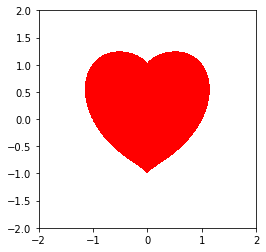

In [64]:
x, y=np.mgrid[-2:2:500j, -2:2:500j]

z=(x**2 + y**2 -1 )**3 -x**2 * y**3

plt.contourf(x,y,z, levels=[-1,0], colors=["red"])

plt.gca().set_aspect("equal")

plt.show()

In [ ]:
# 透视表
total_births = top1k.pivot_table('births', rows= 'year', cols = 'name', aggfunc = sum)

In [65]:
from random import normalvariate 
%timeit samples = [normalvariate(0, 1) for _ in xrange(10000)]

100 loops, best of 3: 8.18 ms per loop
